### in Gaussian normal distribution

In [1]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9],[0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8],[-0.8, 2]])

x0 = rv0.rvs(40)
x1 = rv1.rvs(60)

In [2]:
x = np.vstack([x0, x1])
y = np.hstack([np.zeros(40), np.ones(60)])

컬럼 별로 확률변수로 보는게 아니라 클래스별로 확률변수로 보는건가?..

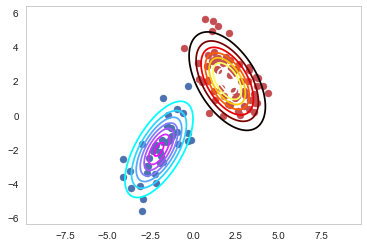

In [17]:
xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)

XX1, XX2 = np.meshgrid(xx1,xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)

plt.scatter(x0[:,0], x0[:,1] , marker= 'o', s=50, c='b')
plt.scatter(x1[:,0], x1[:,1], marker= 'o', s=50, c='r')

plt.axis('equal')
plt.show()

In [18]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB().fit(x,y)

In [22]:
print("클래스 종류 : {} ,\n 클래스별 샘플 수 : {}, \n 클래스별 사전확률 : {}".format(model1.classes_, model1.class_count_, model1.class_prior_))

클래스 종류 : [ 0.  1.] ,
 클래스별 샘플 수 : [ 40.  60.], 
 클래스별 사전확률 : [ 0.4  0.6]


In [23]:
model1.theta_

array([[-1.96197643, -2.00597903],
       [ 2.19130701,  2.12626716]])

##### 가우시안이기때문에 theta는 모수(mean)으로 볼 수 있다.
- 클래스0의 ,x1, x2 각각의 theta는 -1.96197643, -2.00597903
- 클래스1의 ,x1, x2 각각의 theta는 2.19130701,  2.12626716

In [24]:
model1.sigma_

array([[ 1.02398854,  2.31390497],
       [ 1.25429371,  1.93742544]])

##### x1, x2의 분산만 나올뿐 공분산은 빠져있는것을 알 수 있다. (조건부 독립이라서 공분산은 0으로 처리)
- 클래스0의 ,x1, x2 각각의 sigma는 1.02398854,  2.31390497
- 클래스1의 ,x1, x2 각각의 sigma는 1.25429371,  1.93742544

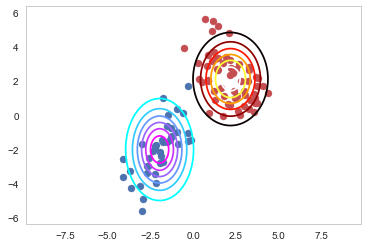

In [26]:
rv0 = sp.stats.multivariate_normal(mean=model1.theta_[0], cov=model1.sigma_[0])
rv1 = sp.stats.multivariate_normal(mean=model1.theta_[1], cov=model1.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)

plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)

plt.scatter(x0[:,0], x0[:,1], marker='o', s=50, c='b')
plt.scatter(x1[:,0], x1[:,1], marker='o', s=50, c='r')

plt.axis('equal')
plt.show()

공분산이 0이기 때문에, 그래프의 기울어짐이 사라졌다...

##### 새로운 test 데이터 샘플을 넣어보자

In [32]:
x_new = np.array([[-0.7, -0.8]])
model1.predict_proba(x_new)

array([[ 0.98300323,  0.01699677]])

클래스0일 확률이 0.983, 클래스1일 확률이 0.017

##### 위 결과가 나온 중간과정을 보자

In [44]:
likelihood = [
    sp.stats.norm(model1.theta_[0], np.sqrt(model1.sigma_[0])).pdf(x_new).prod(),
    sp.stats.norm(model1.theta_[1], np.sqrt(model1.sigma_[1])).pdf(x_new).prod()
]

In [35]:
sp.stats.norm(model1.theta_[0], np.sqrt(model1.sigma_[0])).pdf(x_new).prod()

0.0346968402917242

In [41]:
sp.stats.norm(model1.theta_[0], np.sqrt(model1.sigma_[0])).pdf(x_new)

array([[ 0.18115014,  0.19153637]])

##### 바로 위 출력값의 의미
- `x_new[0]`값을 class0의 x1의 pdf에 넣었을 때 나온 함수값 = 0.18115014
- `x_new[1]`값을 class0의 x2의 pdf에 넣었을 때 나온 함수값 = 0.19153637

In [42]:
0.18115014 * 0.19153637

0.0346968402405918

- prod()은 값 두 개를 곱해준다는 의미
- class0에서 각각의 P(x1|y=class0), P(x2|y=class0)은 서로 독립이다.(조건부 독립)
### 중간과정 결과해석(정리)
- 독립이기 때문에 class0의 likelihood P(x|y=class0)는 P(x1|y=class0) * P(x2|y=class0)로 구할 수 있다.
- (x의 차원이 2개이므로 P(x1,x2|y=class0) : 결합확률을 P(x|y=class0)로 표현).
- 그래서 prod()로 0.18115014 * 0.19153637 해준 것이다.

In [45]:
post = likelihood * model1.class_prior_
post

array([ 0.01387874,  0.00023997])

이 출력값은 P(x_new|y=class0) X P(y=class0)와 P(x_new|y=class1) X P(y=class1)을 구한 것이다.

In [47]:
post/post.sum()

array([ 0.98300323,  0.01699677])

P(x)로 나눠주면 P(y=class0|x_new)와P(y=class1|x_new)일 확률을 각각 구한 것이다

### in Bernoulli distribution

In [21]:
x = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0,0,0,0,1,1,1,1,1,1])

4개의 키워드(4개의 열)를 사용하여 정상메일(y=0) 4개와 스팸메일 6개를 BOW 인코딩한 행렬이다.

In [22]:
from sklearn.naive_bayes import BernoulliNB

In [23]:
model2 = BernoulliNB().fit(x,y)

In [24]:
print("클래스 종류 : {} ,\n 클래스별 샘플 수 : {}, \n 클래스별 사전확률 : {}".format(model2.classes_, model2.class_count_, np.exp(model2.class_log_prior_)))

클래스 종류 : [0 1] ,
 클래스별 샘플 수 : [ 4.  6.], 
 클래스별 사전확률 : [ 0.4  0.6]


`class_prior_`가 있는데 None이 뜸...왜 있는건지...

In [25]:
model2.feature_count_

array([[ 2.,  4.,  3.,  1.],
       [ 2.,  3.,  5.,  3.]])

클래스0는 키워드가 각각 2,4,3,1번 나옴

클래스1는 키워드가 각각 2,3,5,3번 나옴 

In [26]:
model2.feature_count_/model2.class_count_[:,np.newaxis]

array([[ 0.5       ,  1.        ,  0.75      ,  0.25      ],
       [ 0.33333333,  0.5       ,  0.83333333,  0.5       ]])

In [27]:
model2.feature_count_/np.repeat(model2.class_count_[:,np.newaxis],repeats=4, axis=1)

array([[ 0.5       ,  1.        ,  0.75      ,  0.25      ],
       [ 0.33333333,  0.5       ,  0.83333333,  0.5       ]])

In [28]:
model2.alpha

1.0

스무딩 가중치 값이 1.0으로 디폴트 설정되어있다.(model2생성시)

In [29]:
np.exp(model2.feature_log_prob_)

array([[ 0.5       ,  0.83333333,  0.66666667,  0.33333333],
       [ 0.375     ,  0.5       ,  0.75      ,  0.5       ]])

##### bernoulli 분포에서 스무딩은 각 feature의 확률을 0.5에 가까워지도록 만든다.
- feature_log_prob_은 스무딩이 된 상태다.
- 스무딩 전 확률보다 각 확률이 좀 더 0.5에 가까워졌다.

In [67]:
x_new = np.array([[1,1,0,0]])
model2.predict_proba(x_new)

array([[ 0.72480181,  0.27519819]])

##### 위 확률의 도출과정을 살펴보자

In [68]:
theta = np.exp(model2.feature_log_prob_)

In [73]:
p = ((theta ** x_new)*((1-theta)**(1-x_new))).prod(axis=1) * np.exp(model2.class_log_prior_)
p / p.sum()

array([ 0.72480181,  0.27519819])

- 출력값에 대한 설명은 가우시안과 같다.
- x_new(document)는 정상메일이라 볼 수 있다.

### in multi-nomial distribution

In [31]:
x = np.array([    
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

클래스별로 4면체 주사위를 던진 횟수가 다르다
- class0는 10번, class1은 8번

In [4]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB().fit(x,y)

In [5]:
print("클래스 종류 : {} ,\n 클래스별 샘플 수 : {}, \n 클래스별 사전확률 : {}".format(\
                                                                 model3.classes_, model3.class_count_, np.exp(model3.class_log_prior_)))

클래스 종류 : [0 1] ,
 클래스별 샘플 수 : [ 4.  6.], 
 클래스별 사전확률 : [ 0.4  0.6]


얘도 class_prior가 None...

In [6]:
fc = model3.feature_count_
fc

array([[ 12.,  16.,   3.,   9.],
       [  5.,   7.,  18.,  18.]])

class0에서 4면체 주사위를 던져 각 눈이 나온 횟수가 12,16,3,9회

In [7]:
fc / fc.sum(axis=1)[:,np.newaxis]

array([[ 0.3       ,  0.4       ,  0.075     ,  0.225     ],
       [ 0.10416667,  0.14583333,  0.375     ,  0.375     ]])

In [8]:
fc / np.repeat(fc.sum(axis=1)[:,np.newaxis], 4, axis=1)

array([[ 0.3       ,  0.4       ,  0.075     ,  0.225     ],
       [ 0.10416667,  0.14583333,  0.375     ,  0.375     ]])

In [9]:
model3.alpha

1.0

In [12]:
fc.sum(axis=1)

array([ 40.,  48.])

스무딩이 디폴드로 1.0으로 설정되어있다.(model3생성시)

##### 스무딩 과정 좀 더 자세히

In [103]:
(fc + model3.alpha) / (np.repeat(fc.sum(axis=1)[:,np.newaxis], 4, axis=1) + model3.alpha * x.shape[1])

array([[ 0.29545455,  0.38636364,  0.09090909,  0.22727273],
       [ 0.11538462,  0.15384615,  0.36538462,  0.36538462]])

위 결과는 스무딩한 결과다. (각 feature의 확률에 분자에 1, 분모에 4를 더함)

In [104]:
np.exp(model3.feature_log_prob_)

array([[ 0.29545455,  0.38636364,  0.09090909,  0.22727273],
       [ 0.11538462,  0.15384615,  0.36538462,  0.36538462]])

- 같은 결과임.
- multi-nomial분포에서는 bernoulli분포와 스무딩방법이 좀 다름

##### P(y|x_new)의 도출과정 in multi-nomial

In [32]:
x_new = np.array([[1,1,0,0]])
model3.predict_proba(x_new)

array([[ 0.81085951,  0.18914049]])

In [17]:
theta = np.exp(model3.feature_log_prob_)

In [36]:
p = (theta ** x_new).prod(axis=1) * np.exp(model3.class_log_prior_)
p / p.sum()

array([ 0.81085951,  0.18914049])

##### 스무딩 방법의 차이(bernoulli vs multi-nomial)
- bernoulli는 서로 다른 동전 여러개(x1,x2....)가 한 세트를 이루고 있었다.
- 이에 확률도 세트내 각 동전별(x1,x2...)로 (1이 나온 횟수 / 총 반복횟수(행의 갯수))를 구했기 때문에
- 각 동전별로 스무딩이 [[0],[1]] 형식으로 들어갔다.
- 하지만 multi-nomial에서는 4면체 주사위(예를 들어 4면체)의 각 면이 (x1,x2...)가 되기 때문에 한번에 스무딩이 [1,1.....]이 되는 형식이다.
- 정리하면, bernoulli의 스무딩은 fair한 동전을 던져 원 동전별로 나온 결과에 [[0],[1]]을 더해서 확률을 계산하고
- multi-nomial에서는 fair한 정사면체 주사위를 던져 각면이 1번씩 나왔다고 하여 [1,1,1.....]을 더하여 확률을 계산한다.
- 이렇게 되면 bernoulli는 0.5로 다가가게 되고, multi-nomial은 1/N로 다가간다.

##### bernoulli는 class_count로 나누고, multi-nomial은 feature_count의 합으로 나눈다.